# Credit Card Customer Segmentation

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#reading the dataset in
customer = pd.read_csv('customer_segmentation.csv')
customer.head()

,Unnamed: 0,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
#dataset columns and rows
customer = customer.drop(columns = {'Unnamed: 0'})
customer.shape

(10127, 14)

This data set has 10,127 rows(observations) and 14 columns

In [4]:
#columns info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

* There isn't any null value across all columns.

* It has 3 object columns and 11 nuemrical columns

In [5]:
#finding the correlation among columns.
#1> converting object dtypes into dummy variables:
customer_dummies = pd.get_dummies(customer.drop(columns = {'customer_id'}))
customer_dummies.head()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,...,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,3,69000,39,5,1,12691.0,1144,42,0.061,...,0,0,0,1,0,0,0,1,0,0
1,49,5,24000,44,6,1,8256.0,1291,33,0.105,...,0,0,1,0,0,0,0,0,1,0
2,51,3,93000,36,4,1,3418.0,1887,20,0.000,...,0,0,1,0,0,0,0,1,0,0
3,40,4,37000,34,3,4,3313.0,1171,20,0.760,...,0,0,0,1,0,0,0,0,0,1
4,40,3,65000,21,5,1,4716.0,816,28,0.000,...,0,0,0,0,0,1,0,1,0,0


In [6]:
#finding the correlation among columns.
#2>creating the correlation df
corr = customer_dummies.corr().abs()
corr

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,...,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
age,1.000000,0.122254,0.032922,0.788912,0.010931,0.054361,0.002476,0.046446,0.067097,0.007114,...,0.017680,0.029361,0.005040,0.001148,0.020604,0.005693,0.042614,0.047364,0.011248,0.026694
dependent_count,0.122254,1.000000,0.051620,0.103062,0.039076,0.010768,0.068065,0.025046,0.049912,0.037135,...,0.003852,0.001982,0.001858,0.010970,0.001507,0.011532,0.006697,0.014385,0.040707,0.041743
estimated_income,0.032922,0.051620,1.000000,0.027628,0.007181,0.002703,0.515863,0.015861,0.039988,0.277532,...,0.003104,0.010349,0.020572,0.013931,0.002101,0.015371,0.004023,0.020485,0.018926,0.000253
months_on_book,0.788912,0.103062,0.027628,1.000000,0.009203,0.074164,0.007507,0.038591,0.049819,0.007541,...,0.015066,0.027132,0.005289,0.000811,0.015049,0.000576,0.027678,0.033194,0.005065,0.026145
total_relationship_count,0.010931,0.039076,0.007181,0.009203,1.000000,0.003675,0.071386,0.347229,0.241891,0.067663,...,0.019240,0.016016,0.009592,0.001411,0.013676,0.006533,0.009276,0.017001,0.017329,0.009376
months_inactive_12_mon,0.054361,0.010768,0.002703,0.074164,0.003675,1.000000,0.020394,0.036982,0.042787,0.007503,...,0.003132,0.003137,0.010723,0.012748,0.006197,0.003679,0.001796,0.007065,0.008973,0.005053
credit_limit,0.002476,0.068065,0.515863,0.007507,0.071386,0.020394,1.000000,0.171730,0.075927,0.482965,...,0.003016,0.007610,0.006723,0.004923,0.001533,0.009124,0.022578,0.056713,0.032309,0.025291
total_trans_amount,0.046446,0.025046,0.015861,0.038591,0.347229,0.036982,0.171730,1.000000,0.807192,0.083034,...,0.010924,0.007920,0.001364,0.003125,0.000279,0.012376,0.010392,0.063030,0.044772,0.026283
total_trans_count,0.067097,0.049912,0.039988,0.049819,0.241891,0.042787,0.075927,0.807192,1.000000,0.002838,...,0.002343,0.003281,0.007260,0.000068,0.002411,0.010759,0.024863,0.123911,0.098586,0.027551
avg_utilization_ratio,0.007114,0.037135,0.277532,0.007541,0.067663,0.007503,0.482965,0.083034,0.002838,1.000000,...,0.009450,0.010367,0.010073,0.001409,0.005829,0.003922,0.018385,0.049684,0.030493,0.019473


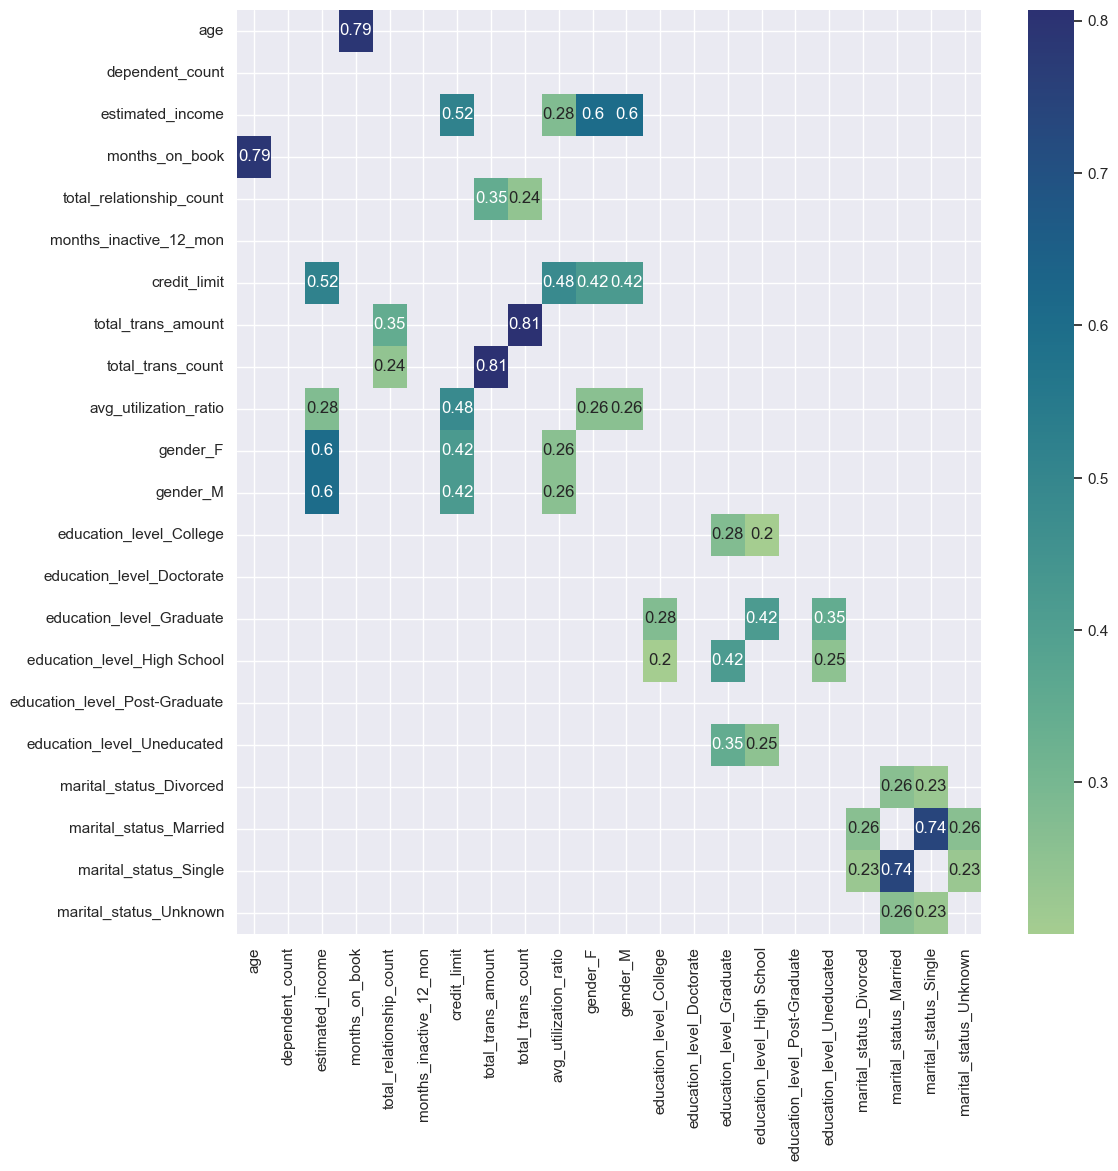

In [7]:
#finding the correlation among columns.
#3>visualizing highly correlated columns
sns.set_theme()
plt.figure(figsize = (12,12))
sns.heatmap(data = corr[(corr>0.2)&(corr<1)], annot = True,cmap = 'crest')
plt.grid()
plt.show()

Highest (meaningful) correlated columns are:
* Age is strongly correlated with how long the person has been a customer (months_on_book);
* Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;
* The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

In [8]:
#creating a distribution plot for numerical columns.1>finding numerical columns
numerical_columns = customer.select_dtypes(include = [np.number]).columns[1:].tolist()
print(numerical_columns)


['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']


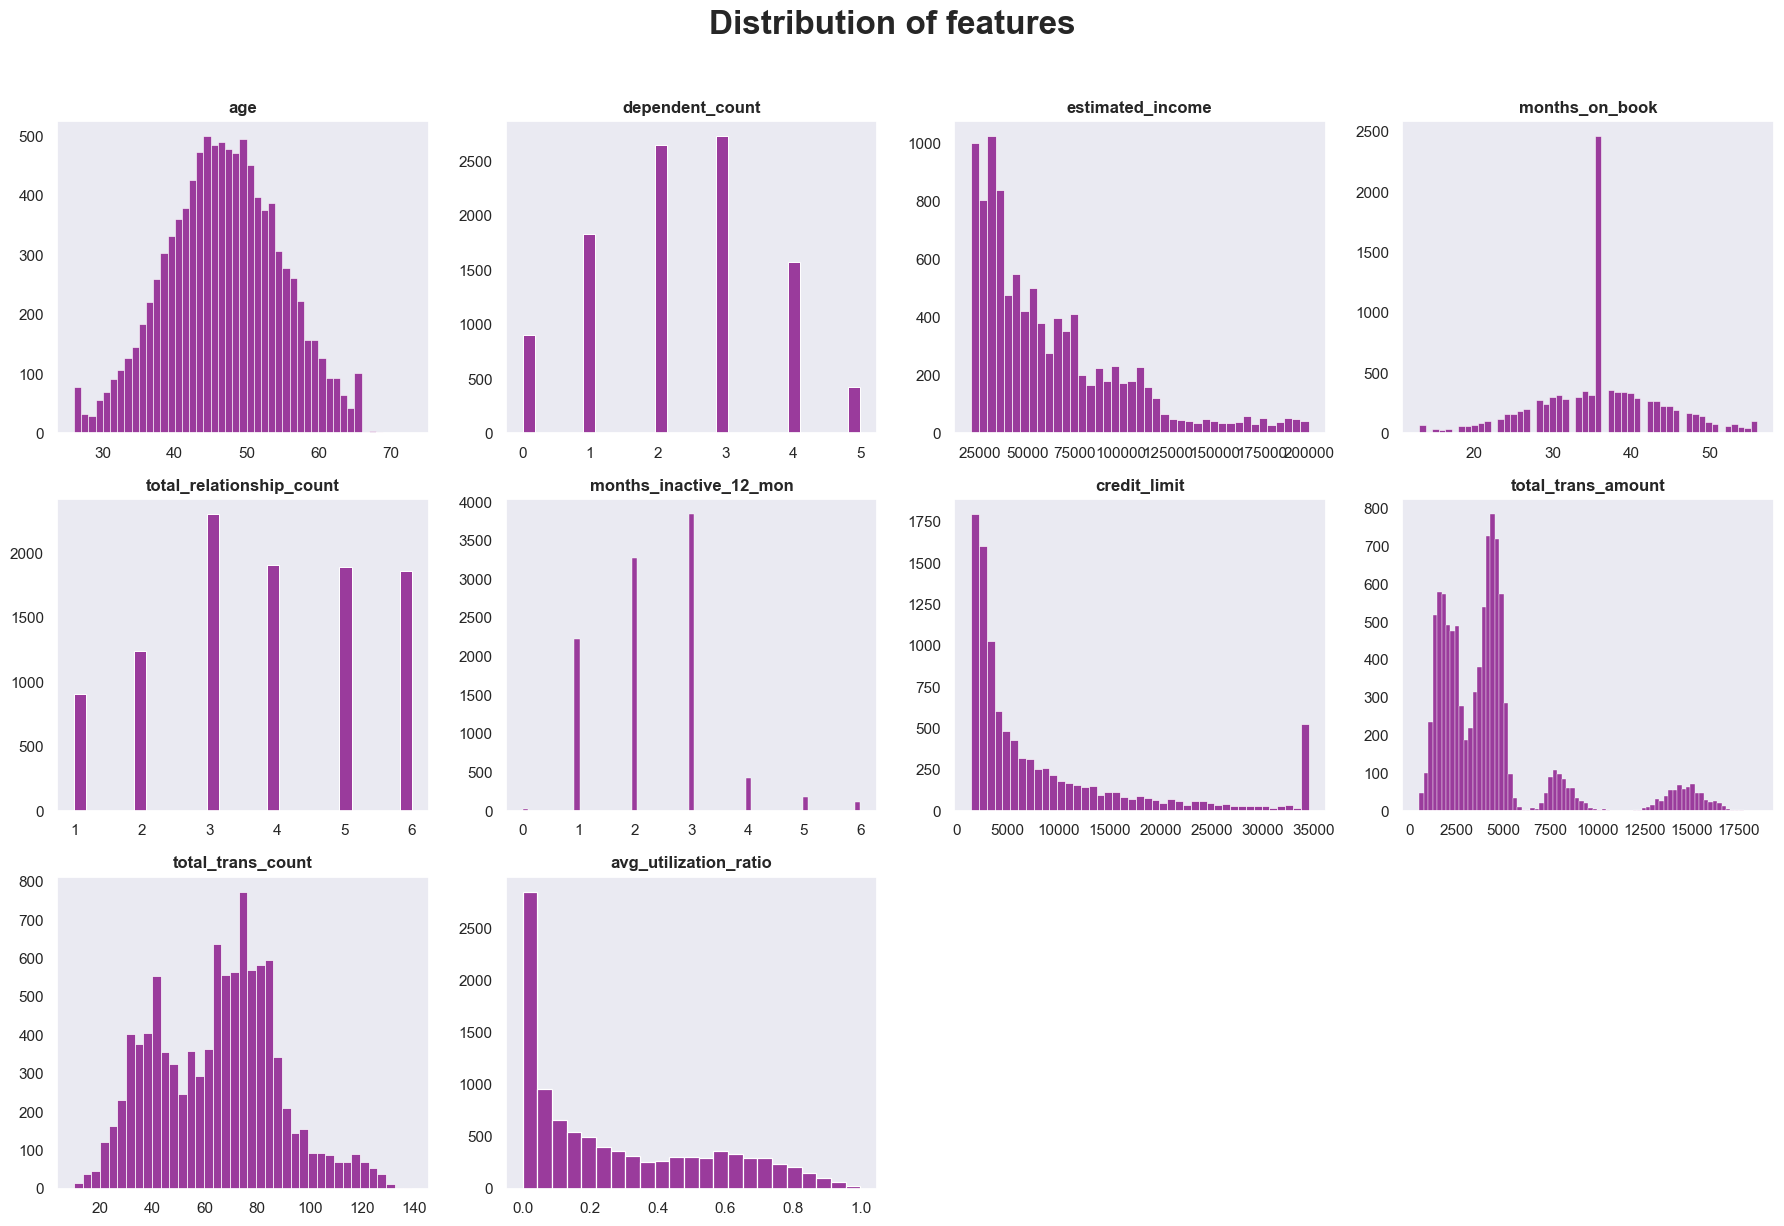

In [9]:
#creating a distribution plot for numerical columns.1>creating a histogram for each columns
fig = plt.figure(figsize = (18,12))
for i,cl in enumerate(numerical_columns):
    ax = plt.subplot(3,4,i+1)
    sns.histplot(data = customer[cl], ax = ax, color = 'purple')
    ax.grid(False)
    ax.set_title(cl, weight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    
plt.suptitle('Distribution of features', weight = 'bold', size = 24, y = 1.02)
plt.tight_layout()    
plt.show()

Some points:
* the only symmetrical distributions are age, months_on_book and dependent_count
* estimated_income, total_trans_amount, credit_limit, avg_utilization_ration are right-skewed

## Feature Engineering

We need to convert categorial columns into numerical types so that we can use them in our model. 
* The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

* The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

In [12]:
#finding unique values in each column
print(customer['gender'].unique())
print(customer['education_level'].unique())

['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'College'
 'Doctorate']


In [13]:
#creating a mapper dict
education_mapper = {k:v for k,v in zip(customer['education_level'].unique(), range(6))}
education_mapper

{'High School': 0,
 'Graduate': 1,
 'Uneducated': 2,
 'Post-Graduate': 3,
 'College': 4,
 'Doctorate': 5}

In [14]:
#mapping gender column into 0-1 values
customers_modif = customer.copy()
customers_modif['gender'] = customers_modif['gender'].map({'M':1, 'F':0})
customers_modif['gender'].value_counts()

0    5358
1    4769
Name: gender, dtype: int64

In [15]:
#mapping education level column
customers_modif['education_level'] = customers_modif['education_level'].map(education_mapper)
customers_modif['education_level'].value_counts()

1    3685
0    2351
2    1755
4    1192
3     616
5     528
Name: education_level, dtype: int64

The marital_status is not categorical order, so we need to use one-hot-coding:

In [16]:
#turning marital_status to dummy variables
marital_dummies = pd.get_dummies(customers_modif['marital_status'])
customers_modif = pd.concat([customers_modif, marital_dummies], axis = 1)
customers_modif = customers_modif.drop(columns = ['marital_status'])
customers_modif 

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,768805383,45,1,3,0,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,1,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,1,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,0,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,2,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,1,51000,40,3,2,4003.0,15476,117,0.462,0,0,1,0
10123,710638233,41,1,2,1,40000,25,4,2,4277.0,8764,69,0.511,1,0,0,0
10124,716506083,44,0,1,0,33000,36,5,3,5409.0,10291,60,0.000,0,1,0,0
10125,717406983,30,1,2,1,47000,36,4,3,5281.0,8395,62,0.000,0,0,0,1


## Scaling the Data

We have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.
We need to transform the data so it's all on the same scale.Otherwise, larger magnitude columns might affect more than lower magnitude columns

In [17]:
#standard scaling the whole dataframe:
customers_modif_copy = customers_modif.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_modif)
customers_modif = scaler.transform(customers_modif)
customers_modif = pd.DataFrame(customers_modif)
customers_modif

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.802878,-0.165406,1.059956,0.503368,-1.107274,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,2.156861,0.333570,-0.943436,2.043199,-0.425652,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,-0.682769,0.583058,1.059956,0.503368,-0.425652,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,0.832862,-0.789126,-0.943436,1.273283,-1.107274,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.814896,-0.789126,1.059956,0.503368,0.255970,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.899389,0.458314,1.059956,-0.266547,-0.425652,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.282405,-0.928214,1.252337,-0.282609
10123,-0.773384,-0.664382,1.059956,-0.266547,-0.425652,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,3.541013,-0.928214,-0.798507,-0.282609
10124,-0.614372,-0.290150,-0.943436,-1.036462,-1.107274,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
10125,-0.589958,-2.036565,1.059956,-0.266547,-0.425652,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.282405,-0.928214,-0.798507,3.538459


## Choosing Number of clusters(K value)

We should decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. 
Then, we'll be able to plot the `Elbow Curve` and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.
* The best K values is the value that has the lowest inertia with the lowest number of clusters

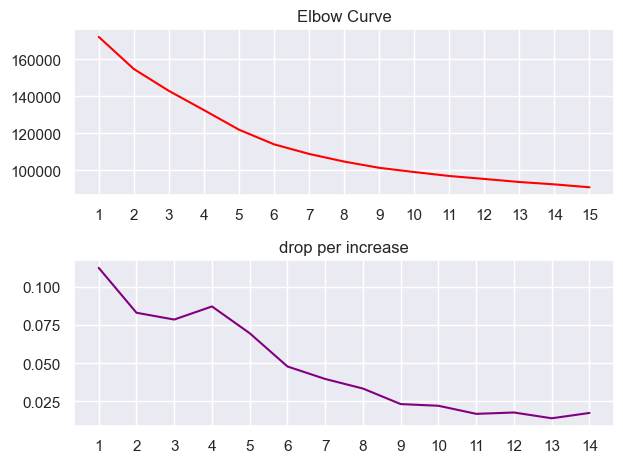

In [18]:
#finding the best k value
inertias = list()
for i in range(1,16):
    model = KMeans(n_clusters = i)
    clusters = model.fit_predict(customers_modif)
    inertias.append(round(model.inertia_,1))
    
inertias_diff = [abs((inertias[i] - inertias[i-1]))/inertias[i] for i in range(1,len(inertias))]

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(range(1,16), inertias, color = 'red')
ax1.set_title('Elbow Curve')
ax1.set_xticks(np.arange(1,16))


ax2.plot(range(1,15), inertias_diff, color = 'purple')
ax2.set_xticks(np.arange(1,15))
ax2.set_title('drop per increase')

plt.tight_layout()
plt.show()

* As we can see from the above picture, the highest drop happens from 5 to 7(indices), and after that we see a diminishing return behavior. As a result, *`6`* seems to be the best number of clusters.

## Analyzing Results

Now we can analyze our customers baised on clusters and see how different features differ between them. 

In [19]:
#creating the cluster column

model = KMeans(n_clusters = 6)
clusters = model.fit_predict(customers_modif)
pd.Series(clusters).value_counts(normalize = True).mul(100).round(1)

1    31.8
3    28.5
0    16.5
2     8.7
5     7.3
4     7.2
dtype: float64

* We see that clusters customers are not evenly distributed among clusters. cluster 4 encompasses about 35% of all customers.

In [20]:
#analyzing clusters>1.assigning clusters to the main dataset
customer['cluster'] = clusters + 1
customer

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,4
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,3
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,6
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,2
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,5


In [21]:
#analyzing clusters>2. plotting a bar chart for numerical columns
numeric_columns = customer.select_dtypes(include = [np.number]).drop(columns = ['customer_id', 'cluster']).columns.tolist()
numeric_columns

['age',
 'dependent_count',
 'estimated_income',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'credit_limit',
 'total_trans_amount',
 'total_trans_count',
 'avg_utilization_ratio']

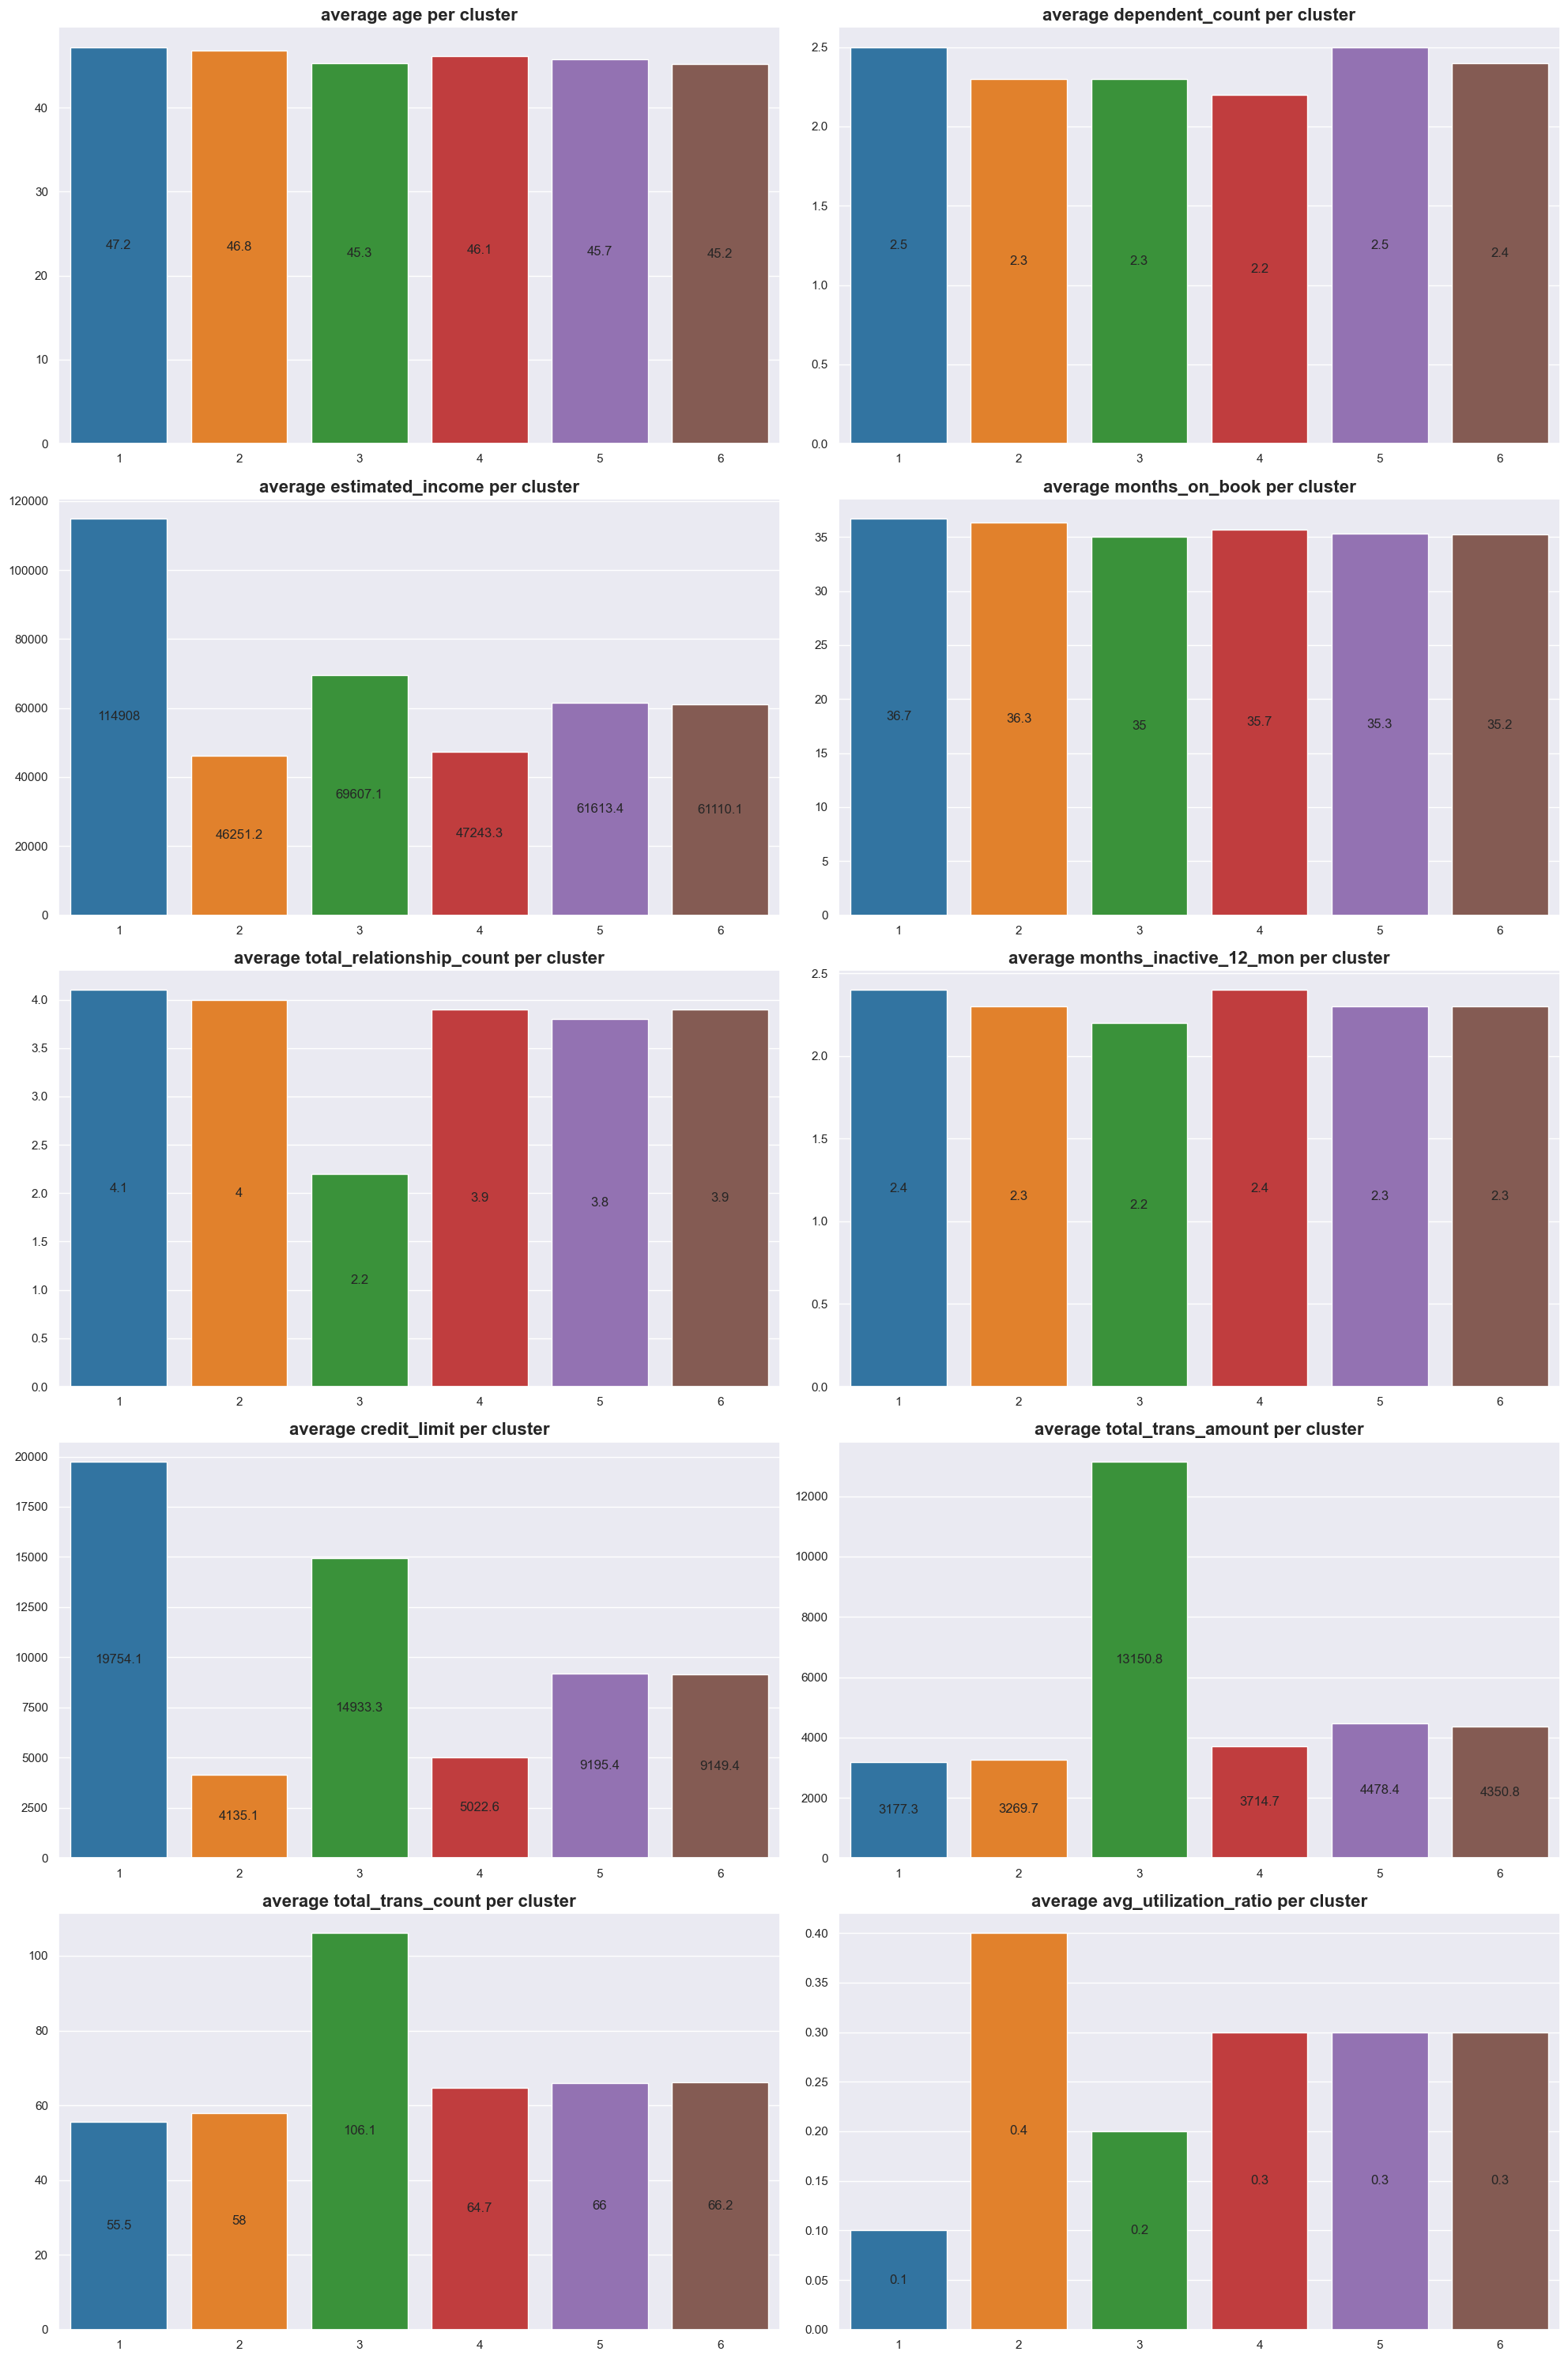

In [165]:
fig = plt.figure(figsize = (20,30))
for i,cl in enumerate(numeric_columns):
    ax = plt.subplot(5,2,i+1)
    gp = customer.groupby('cluster')[cl].mean().round(1)
    gp = pd.DataFrame(gp).reset_index()
    sns.barplot(data = gp, x = 'cluster', y = cl, palette = 'tab10')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'average {cl} per cluster', size = 16, weight = 'bold')
    for val in ax.containers:
        ax.bar_label(val, label_type = 'center')
    

plt.tight_layout()
plt.show()

Some points:
* There is almost no difference between the average age,number of dependents,months on book and 12 months inactive value of the clusters
* Cluster 2 has the highest estimated income and credit limit
* Cluster 3 has the highest total transactions and total transaction count, while the lowest total relationship count.
* Cluster 4 has the lowest credit limit
* Cluster 1 has the lowest estimated income

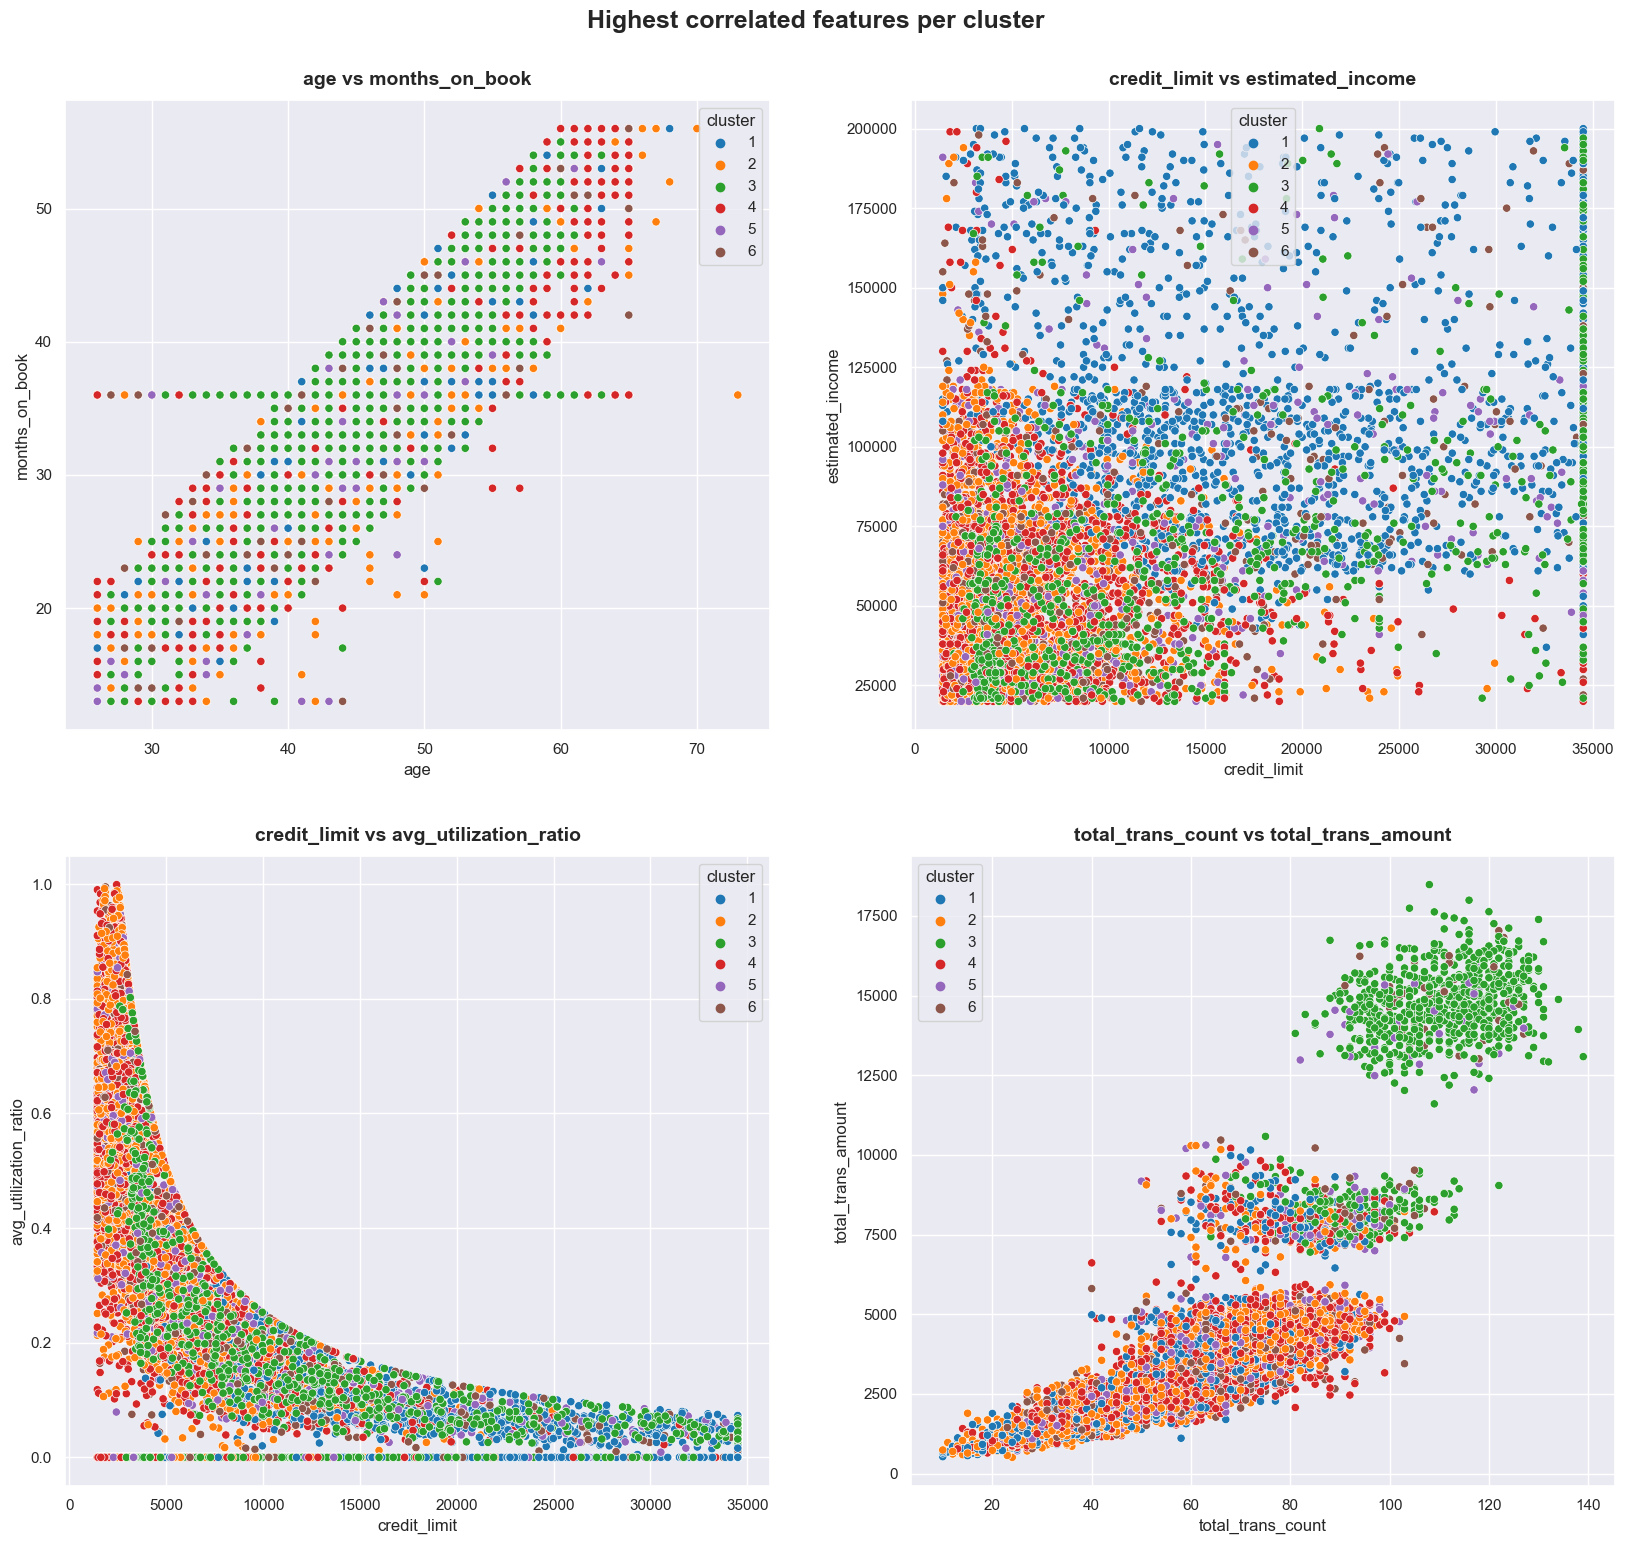

In [169]:
#analyzing clusters>3. creating scatter plots for numerical columns
# we have 10 numerical column. to choose 2 columns out of 10 columns, we have 40 possible combinations.
#So, it's better to only plot scatter plots for highly-correlated columns
#Here is the list of highly correlated columns:
high_corr = [['age','months_on_book'],['credit_limit', 'estimated_income'],['credit_limit','avg_utilization_ratio'],
 ['total_trans_count','total_trans_amount']]

fig = plt.figure(figsize = (20,18))
for index,pair in enumerate(high_corr):
    ax = plt.subplot(2,2,index+1)
    sns.scatterplot(data = customer, x = pair[0], y = pair[1], ax = ax, hue = 'cluster', palette = 'tab10')
    ax.set_title(f'{pair[0]} vs {pair[1]}', weight = 'bold', size = 14, y = 1.01)
    
plt.suptitle('Highest correlated features per cluster', y = 0.93, size = 18, weight = 'bold')
plt.show()




Some points:
* Cluster 3 has the highest tansaction count and amount, while clusters 2 and 4 has the lowest amount referencing these two features
* Clusters 1 and 3 has the highest credit limits
* Althoug cluster 5 has high levels of estimated income, they have mostly low credit limits. Perhaps it might be an opportunity to increase their credit limit, in order to incentivize them to increase their transaction amount.

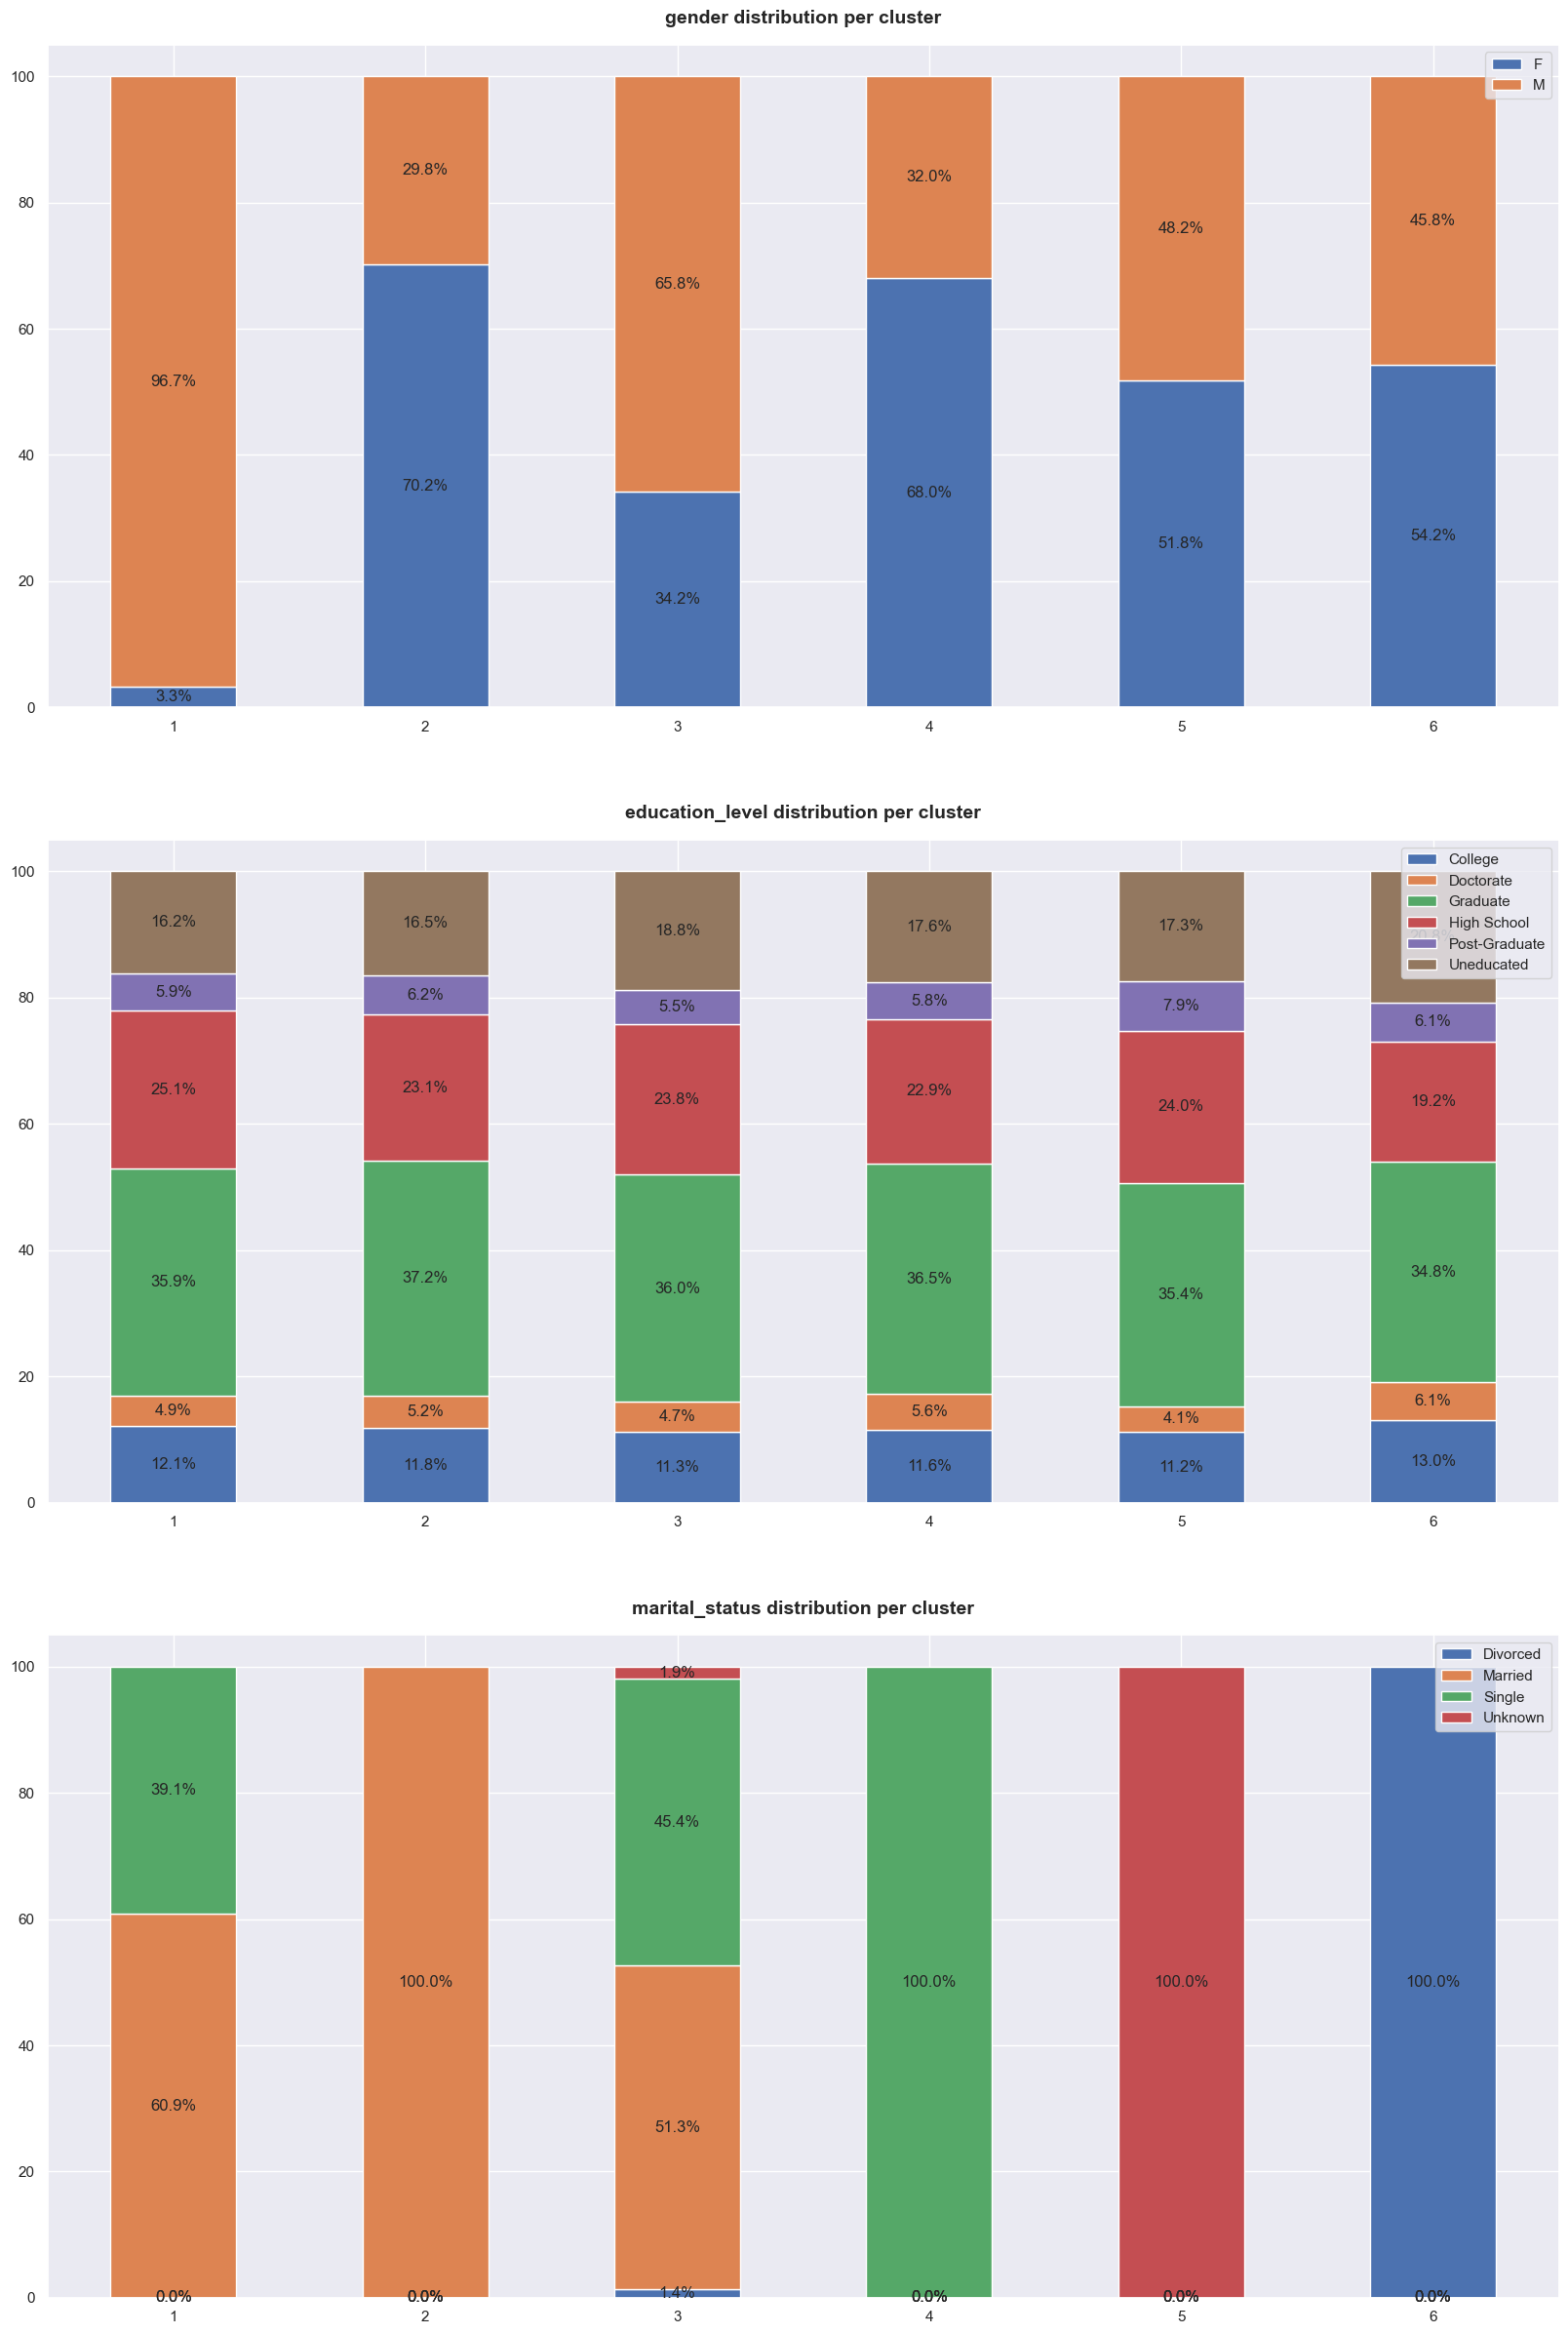

In [171]:
categorical_columns = customer.select_dtypes(include = ['object']).columns.tolist()

fi = plt.figure(figsize = (20,30))
for i , cl in enumerate(categorical_columns):
    ax = plt.subplot(3,1,i+1)
    crosstab = pd.crosstab(index = customer['cluster'], columns = customer[cl],values = customer[cl], 
                       normalize = 'index', aggfunc = 'size')*100
    crosstab.plot(ax = ax, stacked = True, kind = 'bar')
    ax.set_xticklabels(range(1,7), rotation=0)
    ax.set_xlabel('')
    ax.set_title(label = f'{cl} distribution per cluster', fontsize = 14, weight = 'bold', y = 1.02)
    ax.legend(loc = 'upper right')
    for val in ax.containers:
        ax.bar_label(val, label_type = 'center', fmt='%.1f%%')
        


plt.show()

## Conclusion:
* **Cluster 1** are mostly married men.
* **Cluster 2** are mostly married women.
* **Cluster 3** are mostly men, married and single.
* **Cluster 4** are totally single and mostly men.
* **Cluster 5** are both male and female almost evenly, with totally unkown marital status
* **Cluster 6** are totally divorced, both female and male.